In [127]:
import ipywidgets as widgets
from ipywidgets import interact, SelectMultiple, fixed, Checkbox, IntRangeSlider, IntSlider, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express
import plotly.graph_objects as go
from tqdm.autonotebook import tqdm
from PIL import Image
from scipy import stats
from matplotlib.image import NonUniformImage
from src.DataExtractor import DataExtractor


data_extractor = DataExtractor()

In [128]:
df_season_league = data_extractor.get_season_into_dataframe('./hockey/Season20172018/season20172018.json')
df_season_league.tail()

,about.periodTime,about.eventId,team.name,team.id,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet,gamePk
87132,16:01,714,Vegas Golden Knights,54,SHOT,-33.0,-25.0,Colin Miller,Braden Holtby,Wrist Shot,None,None,2017030415
87133,16:06,715,Vegas Golden Knights,54,SHOT,-35.0,-29.0,Colin Miller,Braden Holtby,Slap Shot,None,None,2017030415
87134,16:08,716,Vegas Golden Knights,54,SHOT,-82.0,-3.0,Alex Tuch,Braden Holtby,Wrist Shot,None,None,2017030415
87135,16:09,717,Vegas Golden Knights,54,SHOT,-83.0,-4.0,Alex Tuch,Braden Holtby,Wrist Shot,None,None,2017030415
87136,17:56,723,Vegas Golden Knights,54,SHOT,-54.0,33.0,James Neal,Braden Holtby,Wrist Shot,None,None,2017030415


In [129]:
# cut the image
im = Image.open(r'../figures/nhl_rink.png')
width, height = im.size
print(width, height)
print(width/height)

new_w = width/2
im_new = im.crop((new_w, 0, width, height))

new_width, height = im_new.size
print(new_width, height)

1100 467
2.355460385438972
550 467


In [130]:
##
# rink = [-100,100] * [-42.5, 42.5]
# image =  [0,550] * [0,467]
###
#transformation
ratio_w = new_width / 100
ratio_l = height / 85
source = im_new

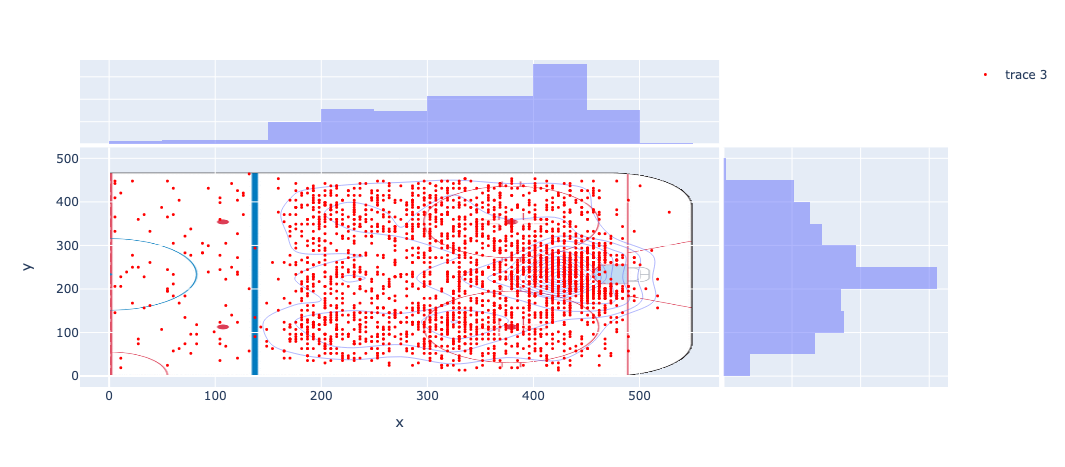

In [62]:
team_1_shots_x, team_1_shots_y = data_extractor.get_team_shots_from_dataframe(df_season_league, 1)

coor_x = np.abs(team_1_shots_x) * ratio_w
coor_y = (team_1_shots_y+42.5) * ratio_l
# fig=go.Figure()
fig = plotly.express.density_contour(x=coor_x, y =coor_y, marginal_x='histogram', marginal_y='histogram')
fig.add_layout_image(
        source=source,
        xref="x",
        yref="y",
        x=0,
        y=height,
        xanchor="left",
        yanchor="top",
        layer="below",
        sizing="stretch",
        sizex=new_width,
        sizey=height
    )           
fig.add_scatter(x=coor_x, y=coor_y, 
                mode="markers",marker=dict(
                    color="red",
                    size=3 ))
fig.update_layout(
    width=new_width,
    height = height,
)

In [131]:
year = 2017
df_season_league = data_extractor.get_season_into_dataframe('./hockey/Season' + str(year) + str(year + 1) + '/season' + str(year) + str(year + 1) + '.json')

In [140]:
def generate_league_shots_per_hour(df_season_league: pd.DataFrame, team_ids: list):
    total_shot_count = 0
    total_league_time_played_in_minutes = 0
    
    for team_id in tqdm(team_ids, total = len(team_ids)):
        team_season_shots_x, team_season_shots_y = data_extractor.get_team_shots_from_dataframe(df_season_league, team_id)
        total_shot_count += len(team_season_shots_x)
        
        team_season_time = data_extractor.get_time_played_from_team_season_dataframe(df_season_league, team_id)
        total_league_time_played_in_minutes += np.sum(team_season_time)
    
    total_league_time_played_in_hours = total_league_time_played_in_minutes / 60
    return total_shot_count / total_league_time_played_in_hours

    
def calculate_league_shots_per_hour(df_season_league: pd.DataFrame) -> float:
    team_ids = list(range(1,56))
    return generate_league_shots_per_hour(df_season_league, team_ids)


def calculate_team_shots_per_hour(df_season_league: pd.DataFrame, team_id: int) -> float:
    team_ids = [team_id]
    return generate_league_shots_per_hour(df_season_league, team_ids)


def generate_total_shots_array(df_season_league: pd.DataFrame, team_ids: list):
    total_shots_x = np.array([])
    total_shots_y = np.array([])
    
    for team_id in tqdm(team_ids, total = len(team_ids)):
        team_season_shots_x, team_season_shots_y = data_extractor.get_team_shots_from_dataframe(df_season_league, team_id)
        total_shots_x = np.append(total_shots_x, team_season_shots_x)
        total_shots_y = np.append(total_shots_y, team_season_shots_y)
        
    return total_shots_x, total_shots_y


def get_total_league_shots_array(df_season_league: pd.DataFrame):
    team_ids = list(range(1,56))
    return generate_total_shots_array(df_season_league, team_ids)


def get_total_team_shots_array(df_season_league: pd.DataFrame, team_id: int):
    team_ids = [team_id]
    return generate_total_shots_array(df_season_league, team_ids)


def get_time_played_for_teams(df_season_league: pd.DataFrame, team_ids: list):
    total_league_time_played_in_minutes = 0
    
    for team_id in tqdm(team_ids, total = len(team_ids)):
        team_season_time = data_extractor.get_time_played_from_team_season_dataframe(df_season_league, team_id)
        total_league_time_played_in_minutes += np.sum(team_season_time)
        
    return total_league_time_played_in_minutes
    

In [133]:
print(calculate_league_shots_per_hour(df_season_league))
print(calculate_team_shots_per_hour(df_season_league, 1))

  0%|          | 0/55 [00:00<?, ?it/s]

32.15092250922509


  0%|          | 0/1 [00:00<?, ?it/s]

32.172413793103445


In [67]:
total_team_shots_x, total_team_shots_y = get_total_team_shots_array(df_season_league, 1)
total_team_shots_x = np.abs(total_team_shots_x * ratio_w)
total_team_shots_y = (total_team_shots_y+42.5) * ratio_l

xmin = total_team_shots_x.min()
xmax = total_team_shots_x.max()
ymin = total_team_shots_y.min()
ymax = total_team_shots_y.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([total_team_shots_x, total_team_shots_y])
kernel = stats.gaussian_kde(values)
Z_team = np.reshape(kernel(positions).T, X.shape)

  0%|          | 0/1 [00:00<?, ?it/s]

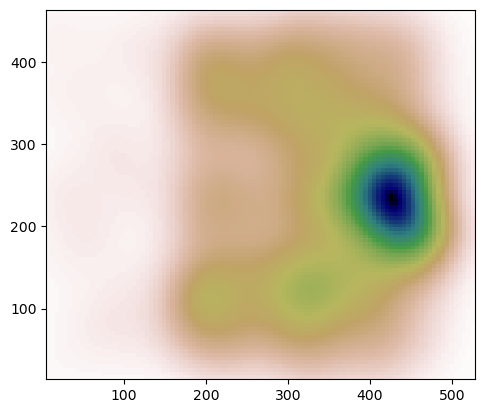

In [69]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z_team), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(total_team_shots_x, total_team_shots_y, 'k.', markersize=0)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [119]:
# put shots in bins
xedges = list(range(0, new_width+1, 10))
yedges = list(range(0, height+1, 10))

H_team, xedges, yedges = np.histogram2d(total_team_shots_x, total_team_shots_y, bins=(xedges, yedges))

# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
print(H_team.sum())
H_team = H_team.T

2798.0


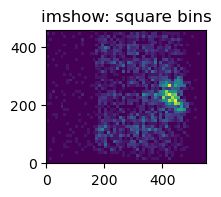

In [120]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H_team, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [71]:
total_league_shots_x, total_league_shots_y = get_total_league_shots_array(df_season_league)
total_league_shots_x = np.abs(total_league_shots_x * ratio_w)
total_league_shots_y = (total_league_shots_y+42.5) * ratio_l

xmin = total_league_shots_x.min()
xmax = total_league_shots_x.max()
ymin = total_league_shots_y.min()
ymax = total_league_shots_y.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([total_league_shots_x, total_league_shots_y])
kernel = stats.gaussian_kde(values)
Z_league = np.reshape(kernel(positions).T, X.shape)

  0%|          | 0/55 [00:00<?, ?it/s]

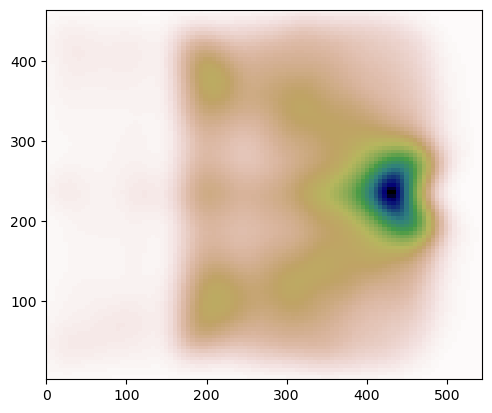

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z_league), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(total_league_shots_x, total_league_shots_y, 'k.', markersize=0)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

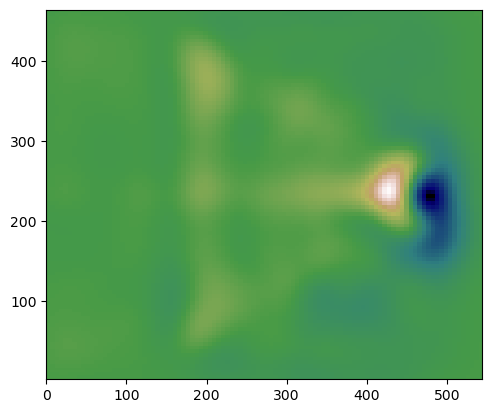

In [73]:
# compare team to the rest of the nhl
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z_team - Z_league), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(total_league_shots_x, total_league_shots_y, 'k.', markersize=0)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [121]:
# put shots in bins
xedges = list(range(0, new_width+1, 10))
yedges = list(range(0, height+1, 10))

H_league, xedges, yedges = np.histogram2d(total_league_shots_x, total_league_shots_y, bins=(xedges, yedges))

# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H_league = H_league.T

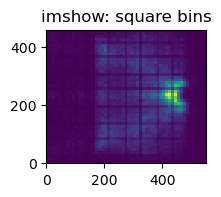

In [122]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H_league, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

[[ -3.   0.  -2. ...   0.   0.   0.]
 [ -5.  -8.  -6. ...   0.   0.   0.]
 [ -4.  -5.  -6. ...   0.   0.   0.]
 ...
 [ -2.  -8.  -7. ...   0.   0.   0.]
 [ -7.  -7. -14. ...   0.   0.   0.]
 [  0.  -2.  -3. ...   0.   0.   0.]]


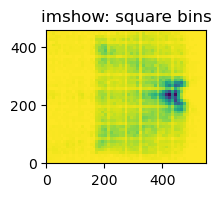

In [126]:
H_diff = H_team - H_league
print(H_diff)
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H_diff, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [141]:
def compute_team_shots_excess_by_hour_for_team(df_season_league: pd.DataFrame, team_id: int, source, width: float, lenght: float):
    ##
    # rink = [-100,100] * [-42.5, 42.5]
    # image =  [0,550] * [0,467]
    ###
    #transformation
    ratio_w = width / 100
    ratio_l = lenght / 85

    total_team_shots_x, total_team_shots_y = get_total_team_shots_array(df_season_league, team_id)
    total_team_shots_x = np.abs(total_team_shots_x * ratio_w)
    total_team_shots_y = (total_team_shots_y+42.5) * ratio_l
    
    total_league_shots_x, total_league_shots_y = get_total_league_shots_array(df_season_league)
    total_league_shots_x = np.abs(total_league_shots_x * ratio_w)
    total_league_shots_y = (total_league_shots_y+42.5) * ratio_l
    
    time_played_by_team = get_time_played_for_teams(df_season_league, [team_id])
    time_played_by_league = get_time_played_for_teams(df_season_league, list(range(1,56)))
    
    # put shots in bins
    xedges = list(range(0, new_width+1, 10))
    yedges = list(range(0, height+1, 10))

    H_team, xedges, yedges = np.histogram2d(total_team_shots_x, total_team_shots_y, bins=(xedges, yedges))
    H_league, xedges, yedges = np.histogram2d(total_league_shots_x, total_league_shots_y, bins=(xedges, yedges))

    # Histogram does not follow Cartesian convention (see Notes),
    # therefore transpose H for visualization purposes.
    H_team = H_team.T
    H_league = H_league.T
    
    H_team = H_team / time_played_by_team
    H_league = H_team / time_played_by_league
    
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(131, title='imshow: square bins')
    plt.imshow(H_team - H_league, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

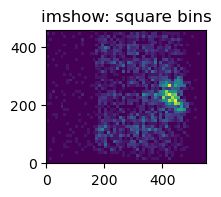

In [142]:
compute_team_shots_excess_by_hour_for_team(df_season_league, 1, source, new_width, height)